In [3]:
import csv
import glob
import pandas
import numpy as np
import random
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
# with open(data_file,'r') as csvfile:
#     data = pandas.read_csv(data_file)

/Users/msuguitan/Downloads/Face+to+Movements+-+432+-+1500*
/Users/msuguitan/Downloads/Face+to+Movements+-+432+-+1500_July+28,+2021_21.56.csv
50 50
(54, 50)
(54, 50)
(52, 31)
(50, 30)


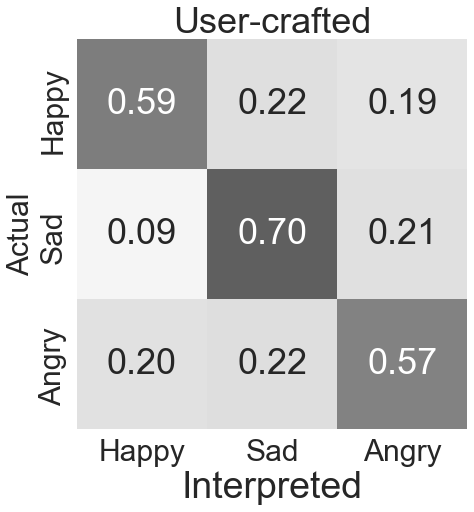

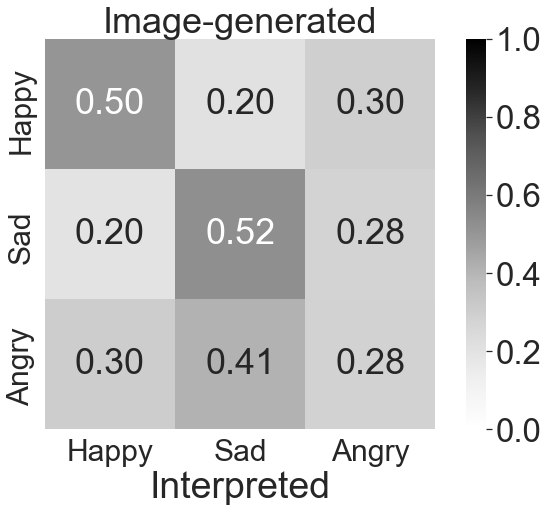

In [6]:
question_type = 'text'
# question_type = 'images'
cont_tables = {}
run, epoch = 432, 1500
for question_type in ['images']:

    with open(f'../recorder/vids_faces_urls_{run}_{epoch}.csv') as csvfile:
        vids_faces_urls = pandas.read_csv(csvfile)
    csvfile_name = f'/Users/msuguitan/Downloads/Face+to+Movements+-+{run}+-+{epoch}*'
#     if question_type=='text': csvfile_name = csvfile_name.replace('*','+-+401+-+T*')
    print(csvfile_name)
    csvfile = sorted(glob.glob(csvfile_name))[-1]
    # csvfile = sorted(glob.glob('./Face+to+Movements+-+401+-+T*'))[-1]
    print(csvfile)
    df = pandas.read_csv(csvfile)
    # df.loc(list(qualtrics_vids.keys())[0])
    orig_names = list(df.columns)
    new_names = list(df.iloc[0,:])
    # print(new_names)
    # print(new_names.index('Recipient Last Name'))
    # new_names[new_names.index('Recipient Last Name')+1:] = 
    id_start_idx = orig_names.index('142_Q3.2')
    for n,new_name in enumerate(new_names):
        # skip until id_start_idx
        if n<id_start_idx or n==(len(new_names)-1): continue
        try:
    #         new_names[n] = ck_emotions[qualtrics_vids[new_names[n].split()[0]]]
    #         print(new_name.split()[0])
            new_names[n] = vids_faces_urls.vid.values[vids_faces_urls.vid_url==new_name.split()[0]][0]
            emotion_n = vids_faces_urls.vid_emotion.values[vids_faces_urls.vid==new_names[n]][0]
            source_n = 'gen' if new_names[n][0]=='S' else 'user'
            new_names[n] = f"{emotion_n}_{source_n}_{new_names[n]}"
        except:
            print(new_name)
    print(len(orig_names), len(new_names))
    print(df.shape)

    df = df.rename(columns = {orig_name:new_name for orig_name,new_name in zip(orig_names,new_names)})
    print(df.shape)

    df = df.drop([0,1])
    drop_columns=['Start Date','End Date','IP Address','Recorded Date','Response ID','Recipient Last Name',
                    'Recipient First Name','Recipient Email','External Data Reference','Location Latitude','Location Longitude','Distribution Channel','User Language',
                    'Response Type',
                 'Progress','Duration (in seconds)','Finished','Please enter your Mechanical Turk ID:','Random ID']
    # df = df.drop(columns=[drop_columns])
    durations = df['Duration (in seconds)'].astype(int)
    for drop_column in drop_columns:
        try: 
            df = df.drop(columns=[drop_column])
        except:
            print(f"Couldnt find {drop_column}")
    print(df.shape)
    # df.drop(columns=[df.filter(like='Online Survey Consent')])
    # df = df[df.columns.drop(list(df.filter(regex='Online Survey Consent')))]
    # df.loc[:,~df.columns.str.startswith('Online Survey Consent')]

    df = df.drop(columns=df.columns[0], axis=1,)
    # df = df[:,1:]
    df = df[:50]
    print(df.shape)

    emotions = ['angry','happy','sad']
    Emotions = ['Angry','Happy','Sad']
    # df = df.replace({Emotion:emotion for Emotion,emotion in zip()})
    # df = df.replace(dict(zip(Emotions,emotions)))
    # df = df[:250]
    df

    emotions = ['happy','sad','angry']
    emotion_conf_mat_dict = {}
    label_len = 0

    srcs = ['user','gen']
    conf_mats = []
    for s,m in enumerate(['_user','_gen']):
        
        for emotion in emotions:
            df_emotion = list(np.concatenate(df.filter(regex=emotion+m).values))
    #         print(df_emotion.values)
            label_len = len(df_emotion)
    #         emotion_counts = df_emotion.iloc[0].value_counts()[0]
    #         print(emotion_counts)
            emotion_conf_mat_dict.update({f"{emotion}{m}":df_emotion})
    #         print(emotion_counts/sum(emotion_counts))
    #         print(f"{emotion}_{m}\n",emotion_counts)
    # #         df_emotion = df.replace({'Correct':1,'Wrong':0})
    #         df_emotion = df_emotion.dropna(axis=0,how='all').dropna(axis=1,how='all')
    #         df_len = df_emotion.shape[1]
    #     #     print(df_emotion.shape)
    #     #     print(df_emotion.dropna(axis=,how='all'))
    #         correct_count = df_emotion.sum(axis=0,skipna=True)
    #         print(correct_count)
    #         correct_count = sum(correct_count)
    #         print(correct_count/df_len)
#         print(emotion_conf_mat_dict)
    # print([[emotion]*label_len for emotion in emotions])
        y_true = list(np.concatenate([[emotion]*label_len for emotion in emotions]))
        y_pred=list(np.concatenate([emotion_conf_mat_dict[emotion+m] for emotion in emotions]))
#         print(y_true)
#         print(y_pred)
        conf_mat_s = confusion_matrix(
                    y_true=y_true,
                    y_pred=y_pred,labels=emotions)
        conf_mat_s = [conf_mat_row/sum(conf_mat_row) for conf_mat_row in conf_mat_s]
        conf_mats.append(conf_mat_s)
    cont_tables.update({question_type:emotion_conf_mat_dict})


    conf_mat_max = np.max([np.sum(c,axis=1) for c in conf_mats])
    # conf_mat_max = 1
    titles = ['User-crafted','Image-generated']
#     titles = [title+f' ({question_type})' for title in titles]
    for s,conf_mat in enumerate(conf_mats):
        fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
        font_scale = 3
        sn.set(font_scale=font_scale)
        sn.heatmap(conf_mat,
           vmin=0,vmax=conf_mat_max,
           cmap='Greys',
           annot=True,
           square=True,
           fmt='.2f',
           ax=ax,
           cbar=bool(s),
        )

        yticks = plt.yticks()[0]
        yticks = [ytick-0.5 for ytick in yticks]
        yticks = [(i*1.05)+0.15 for i in range(3)]
        yticks = [0.3,1.4,2.3]
    #         print(yticks)
    #         ytick_labels = []
    #     yticklabels=['{} ({}%)'.format(emotion,acc) for emotion,acc in zip(emotions_survey,emotion_accs)]
        yticklabels = [e.capitalize() for e in emotions]

        ax.set_yticks(ticks=yticks,)
        ax.set_yticklabels(labels=yticklabels,
                              fontsize=font_scale*10,
    #                               rotation=90, 
                             )
        ax.set_xticklabels(labels=yticklabels,
                              fontsize=font_scale*10,
    #                               rotation=90, 
                             )

    #         ax[s].set_xlabel("Interpreted ({}% accuracy)".format(conf_mat_acc),fontsize=25)
        ax.set_xlabel("Interpreted",fontsize=font_scale*12.5)
        ax.set_title(titles[s])
        if s==0: ax.set_ylabel("Actual")
    #     ax[s].set_ylabel("Actual ({}, {}%)".format(source_text, conf_mat_acc),fontsize=25)
        fig.tight_layout()
        plt.savefig(f'./conf_mat_{run}_{epoch}_{srcs[s]}.png')


In [2]:
# print(cont_tables)
from statsmodels.stats.weightstats import ztest,ttest_ind,ttost_ind
equiv_int = 0.1

for emotion in emotions:
    for src in ['user','gen']:
        print(src.capitalize())
        img_table = cont_tables['images'][f'{emotion}_user']
        txt_table = cont_tables['images'][f'{emotion}_gen']
#         print(img_table)
        img_table = np.array([emotion==i for i in img_table])
        txt_table = np.array([emotion==i for i in txt_table])
        print(sum(img_table)/len(img_table),sum(txt_table)/len(txt_table))
#         print(f'{emotion}: z-test p-value: {int(ztest(img_table,txt_table)[1]*100)/100}')
        test_results = ttost_ind(img_table,txt_table,low=-equiv_int,upp=equiv_int)
        print(f'{emotion}: t-test p-value: {int(test_results[0]*100)/100}')
#         print(img_table)
#         _cont_table = [
#             [sum(img_table & txt_table), sum(img_table & np.invert(txt_table))],
#             [sum(np.invert(img_table) & txt_table), sum(np.invert(img_table) & np.invert(txt_table))]
#         ]
#         print(_cont_table)
#         img_table = []

NameError: name 'emotions' is not defined

In [11]:
durations.to_frame().mean()/60


Duration (in seconds)    17.423333
dtype: float64

In [6]:
!rm vids_*

zsh:1: no matches found: vids_*


In [36]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, 

In [ ]:
triplet_only_run = 